In [28]:
import tensorflow.keras as keras
from tensorflow.keras import preprocessing
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Conv2D
from   tensorflow.keras.layers import MaxPooling2D
from   tensorflow.keras.layers import Dense
from   tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os



In [30]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    validation_split = 0.25
)

data_path='./data/train/'
train_set = train_datagen.flow_from_directory(
    data_path,
    target_size = (40, 40),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset='training'
)
valid_set = train_datagen.flow_from_directory(
    data_path,
    target_size = (40, 40),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset='validation'
)

Found 187611 images belonging to 12 classes.
Found 62530 images belonging to 12 classes.


In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(12, activation='softmax'))
# compile model
adam = tf.keras.optimizers.Adam(lr = 5e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

E:\Programming\Python\Kagel_Work\.venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
model.fit(train_set,validation_data=valid_set,epochs=1, verbose=1)

5863/5863 [==============================] - 408s 70ms/step - loss: 0.3140 - accuracy: 0.8991 - val_loss: 0.2752 - val_accuracy: 0.9128

In [31]:
val_loss, val_accuracy = model.evaluate(valid_set)
print(val_loss,val_accuracy)

1955/1955 [==============================] - 42s 21ms/step - loss: 0.2746 - accuracy: 0.9137

In [18]:
model.load_weights('./models/Digit_Recognizer/')

INFO:tensorflow:Assets written to: ./models/Digit_Recognizer/assets


In [29]:
tf.keras.models.load_model('./models/Digit_Recognizer/')

In [19]:
def prediction(img):
    #img = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    img = cv2.resize(img,(40, 40))
    norm_image = cv2.normalize(img, None, alpha = 0, beta = 1, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    #norm_image=img/255
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = model.predict_classes([case])

    return ([i for i in train_set.class_indices if train_set.class_indices[i]==(pred[0])][0],pred)

('5', array([7], dtype=int64))

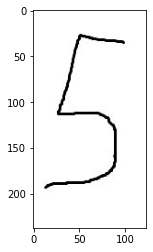

In [27]:
image = cv2.imread('././././data/singlenumber.JPG', cv2.IMREAD_GRAYSCALE)

prediction(image)
